<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Data Visualization with pandas
---


In this lesson we'll be learning how to use pandas to create line charts, bar charts, scatterplots, and histograms.

## Let’s Revisit Data Visualization
---

Data visualizations are a quick way to convey insights from data sets. Specifically, we can use visuals to:
- Identify outliers during exploratory data analysis.
- Describe patterns or trends in the data.
- Summarize the results of an analysis and communicate key insights.

Because of the way the human brain processes information, charts or graphs that visualize large amounts of complex data are easier to understand than spreadsheets or reports. Data visualization is a quick, easy way to convey concepts in a universal manner, and you can experiment with different scenarios by making slight adjustments.

**Recap:** Criteria for Good Visualizations
- The title is the takeaway
- Use color deliberately
- Label the axes
- Use  s p a c e  effectively in your chart type and layout

With so many chart types, it can be difficult to know how best to display your data. When creating a visualization, first think about the **variables** you are displaying. Next think about the **volume** of data you’re showcasing. Also decide on the **central point you are hoping to communicate** through your visualization. 

Choosing the wrong type of chart for a given data point can result in audience confusion or even be downright misleading. If you're unsure of which chart type to use, it may be that you don't have a clear enough point you're trying to make with said chart. 

<details><summary>We often generate data visualizations for exploratory analysis or explanatory analysis. What is the difference?</summary>
    
- Exploratory analysis is when we are exploring our data, like identifying patterns or discovering outliers.
- Explanatory analysis is when we are communicating (explaining) our results to a client, boss, stakeholder, etc.
</details>

### A quick pop quiz!

Which type of data visualization should we use for the scenarios below?

<details><summary>Change in average income since 1960 for American adults.
</summary>
Line charts are ideal for expressing change over time.
</details>

<details><summary>Amount of sales per state.
</summary>
Bar charts are best for comparing numbers.
</details>

<details><summary>Determine if there's a correlation between book length and sales.
</summary>
Scatterplots can compare the relationship between two variables.
</details>

## Using pandas to Visualize Data
---
pandas DataFrame objects use another library, known as **Matplotlib**, behind the scenes.This means you can use Matplotlib functions in combination with pandas methods to alter plots after drawing them. 

For example, you can use Matplotlib’s xlabel() and title() functions to label the plot’s x axis and title, respectively, after it is drawn.

When researching how to get something done with pandas visualizations, you can look into Matplotlib's functionality as well. You might find more specific customizations for your plots by looking in the Matplotlib documentation instead of the pandas documentation (although pandas’ is pretty thorough).

As we explore different types of plots, notice:


1. Different types of plots are drawn very similarly — they even tend to share parameter names.
2. In pandas, calling plot() on a DataFrame is different than calling it on a Series. Although the methods are both named “plot,” they may take different parameters.

Once you’ve loaded data into a pandas DataFrame, creating a chart is as simple as using the `.plot()` method. By default, the `.plot()` method will create a line chart. As we’ve seen previously, this won't always be appropriate.

You may want to alter certain aspects of the chart, such as:
- The kind of plot you want (line, bar, scatter, etc.).
- The style of the lines, including color and line consistency.
- The size of the chart, or figsize.
- ... plus many other settings! 

Customizations can be made using keyword parameters:
`data_frame['column_name'].plot(style={'col1': 'r'}, figsize=(16,9))`



### Imports
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Line Charts
---

Line charts (or line graphs) are an excellent way to show **change over time**. They work best when you have one time variable and one set of data points to show. 

While bar charts can also display time, they don’t show it in a continuous way.

Let's start off with a new dataset that stores international football results.

### Load the data
---

Use pandas to load the csv file as a pandas DataFrame.

In [2]:
#load file into Jupyter
soccer_stats = pd.read_csv('https://raw.githubusercontent.com/julianoquendoga/ga_datasets_repo/main/international_football_results.csv')

Perform a few exploratory data analysis operations before working with the data set. 

In [3]:
#Show the type of data
type(soccer_stats)

pandas.core.frame.DataFrame

In [4]:
#See the first 5 rows of data
soccer_stats.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False


In [5]:
soccer_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39669 entries, 0 to 39668
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        39669 non-null  object
 1   home_team   39669 non-null  object
 2   away_team   39669 non-null  object
 3   home_score  39669 non-null  int64 
 4   away_score  39669 non-null  int64 
 5   tournament  39669 non-null  object
 6   city        39669 non-null  object
 7   country     39669 non-null  object
 8   neutral     39669 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 2.5+ MB


In [6]:
soccer_stats.shape

(39669, 9)

In [7]:
soccer_stats.describe

<bound method NDFrame.describe of              date home_team away_team  home_score  away_score      tournament  \
0      1872-11-30  Scotland   England           0           0        Friendly   
1      1873-03-08   England  Scotland           4           2        Friendly   
2      1874-03-07  Scotland   England           2           1        Friendly   
3      1875-03-06   England  Scotland           2           2        Friendly   
4      1876-03-04  Scotland   England           3           0        Friendly   
...           ...       ...       ...         ...         ...             ...   
39664  2018-07-06   Uruguay    France           0           2  FIFA World Cup   
39665  2018-07-06    Brazil   Belgium           1           2  FIFA World Cup   
39666  2018-07-07    Sweden   England           0           2  FIFA World Cup   
39667  2018-07-07    Russia   Croatia           2           2  FIFA World Cup   
39668  2018-07-10    France   Belgium           1           0  FIFA World C

In [8]:
soccer_stats.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [9]:
soccer_stats.index

RangeIndex(start=0, stop=39669, step=1)

We can use the `.to_datetime()` method and `.dt.year` property to create a "year" column.

In [10]:
#convert to datetime
soccer_stats['date'] = pd.to_datetime(soccer_stats['date'])

In [11]:
soccer_stats.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

In [12]:
#show just the year
soccer_stats['year'] = soccer_stats['date'].dt.year

In [13]:
soccer_stats.head()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


Let's chart how many games occured in each year! 

First of all, let's look at the data we're going to plot.

In [14]:
#Show total games per year
soccer_stats['year'].value_counts()

2008    1087
2011    1077
2004    1059
2000    1022
2001    1014
        ... 
1878       2
1874       1
1873       1
1875       1
1872       1
Name: year, Length: 147, dtype: int64

The years are out of order! Fortunately, we can sort our column by its index with `sort_index()`.

In [15]:
soccer_stats['year'].value_counts().sort_index()

1872       1
1873       1
1874       1
1875       1
1876       2
        ... 
2014     857
2015    1001
2016     918
2017     908
2018     390
Name: year, Length: 147, dtype: int64

Finally, we're ready to plot the change over time with `.plot()`.

<Axes: >

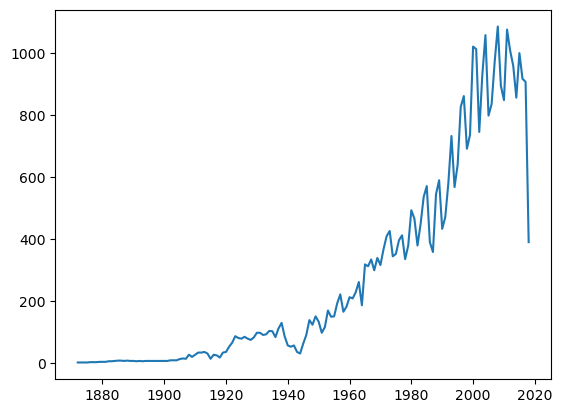

In [16]:
soccer_stats['year'].value_counts().sort_index().plot()

This line grap shows the number of football games per year in our dataset.

Note the output we get above the plot - this is a quirk of matplotlib that can be silenced by adding a semicolon ; to the end of our plotting cell.

The last year in the plot looks like it might be missing data... We can exclude it by only plotting everything EXCEPT the last data point. The shorthand for this is to add `[:-1]` to the end of the data selection.

In [17]:
#this isnt working quite right. Research
soccer_stats['year'][:-1]

0        1872
1        1873
2        1874
3        1875
4        1876
         ... 
39663    2018
39664    2018
39665    2018
39666    2018
39667    2018
Name: year, Length: 39668, dtype: int64

<Axes: >

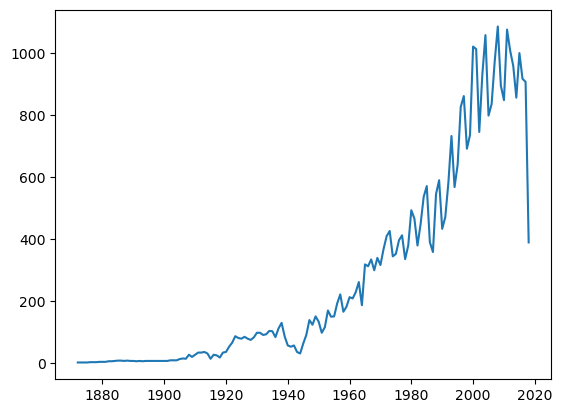

In [18]:
soccer_stats['year'][:-1].value_counts().sort_index().plot()

<Axes: >

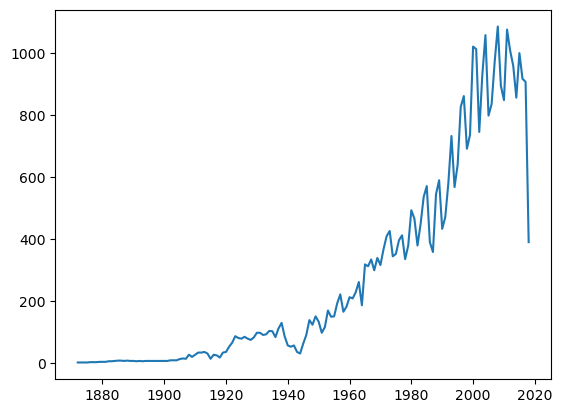

In [19]:
soccer_stats['year'].value_counts().sort_index().plot()

Next, let's try filtering for all of the soccer games that are included in the FIFA tournament. 

In [20]:
soccer_stats['tournament'].value_counts()

Friendly                                16475
FIFA World Cup qualification             7100
UEFA Euro qualification                  2332
African Cup of Nations qualification     1558
FIFA World Cup                            897
                                        ...  
Copa Félix Bogado                           6
Copa Ramón Castilla                         6
Dragon Cup                                  4
OSN Cup                                     4
Copa América qualification                  2
Name: tournament, Length: 102, dtype: int64

What are the value counts of our FIFA selection?

In [21]:
fifa_games = soccer_stats['tournament'].str.contains('FIFA')
fifa_games

0        False
1        False
2        False
3        False
4        False
         ...  
39664     True
39665     True
39666     True
39667     True
39668     True
Name: tournament, Length: 39669, dtype: bool

In [22]:
soccer_stats[fifa_games]

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
1277,1930-07-13,Belgium,USA,0,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1278,1930-07-13,France,Mexico,4,1,FIFA World Cup,Montevideo,Uruguay,True,1930
1279,1930-07-14,Brazil,Yugoslavia,1,2,FIFA World Cup,Montevideo,Uruguay,True,1930
1280,1930-07-14,Peru,Romania,1,3,FIFA World Cup,Montevideo,Uruguay,True,1930
1281,1930-07-15,Argentina,France,1,0,FIFA World Cup,Montevideo,Uruguay,True,1930
...,...,...,...,...,...,...,...,...,...,...
39664,2018-07-06,Uruguay,France,0,2,FIFA World Cup,Nizhny Novgorod,Russia,True,2018
39665,2018-07-06,Brazil,Belgium,1,2,FIFA World Cup,Kazan,Russia,True,2018
39666,2018-07-07,Sweden,England,0,2,FIFA World Cup,Samara,Russia,True,2018
39667,2018-07-07,Russia,Croatia,2,2,FIFA World Cup,Sochi,Russia,False,2018


Let's plot the FIFA games over time.

In [23]:
soccer_stats[fifa_games]['year'].value_counts()

2001    489
2008    417
2004    412
1997    408
2005    353
       ... 
1964     14
1937     14
1933      5
1956      4
1971      1
Name: year, Length: 62, dtype: int64

In [24]:
# Sort the index to have them appear chronologically! 

In [25]:
soccer_stats[fifa_games]['year'].value_counts().sort_index()

1930     18
1933      5
1934     37
1937     14
1938     26
       ... 
2014     64
2015    233
2016    255
2017    310
2018     61
Name: year, Length: 62, dtype: int64

In [26]:
#Can give it its own name to make it easier 
fifa_index = soccer_stats[fifa_games]['year'].value_counts().sort_index()

Now plot! 

<Axes: >

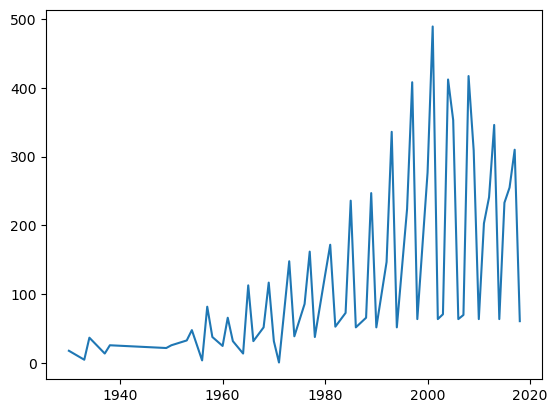

In [27]:
soccer_stats[fifa_games]['year'].value_counts().sort_index().plot()

<Axes: >

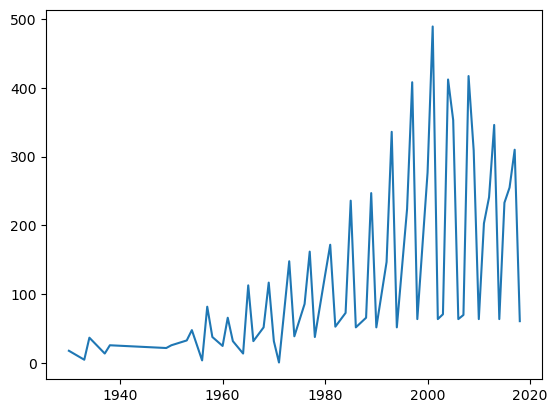

In [28]:
#same results but easier with its own name
fifa_index.plot()

Notice that people have been playing soccer for much longer than FIFA has been around! 

In [29]:
#rename all games
all_games = soccer_stats['year'].value_counts().sort_index()

<Axes: >

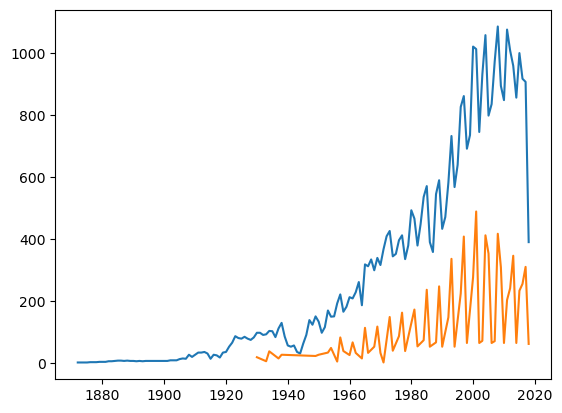

In [30]:
#Show total games vs total fifa games
all_games.plot()
fifa_index.plot()

<Axes: >

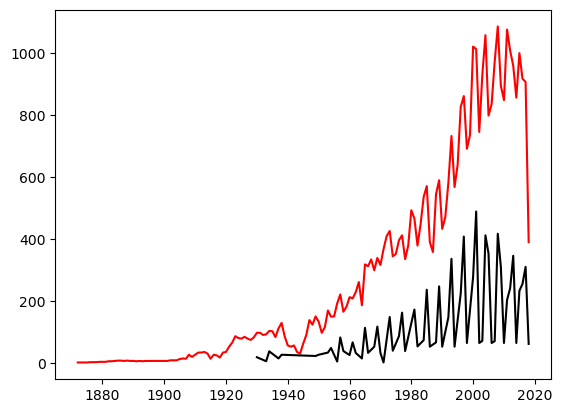

In [31]:
#colors
all_games.plot(c = 'r')
fifa_index.plot( c = 'k')

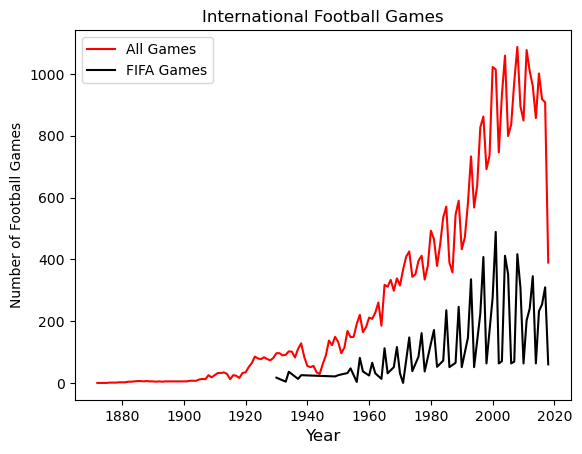

In [32]:
#plotlibsomething
all_games.plot(c = 'r', label = 'All Games')
fifa_index.plot( c = 'k', label = 'FIFA Games')

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Number of Football Games')
plt.title('International Football Games')
plt.legend()

plt.savefig('football_linechart.png')

In [33]:
pwd

'/Users/jessedeatherage'

## Bar Charts
---

Bar charts are one of the most common ways of visualizing data. Why? Because they make it easy to compare information among categories, revealing highs and lows quickly and efficiently. 

Bar charts are most effective when you have **categorical data** and want to explore counts of different categories.

When thinking about using a bar chart, consider:
- Will you use vertical or horizontal bars?
- How will you number your axis (it is always best to start at zero)?
- How will you order your bars?


Let's see how many games each country played, represented as a bar chart

<Axes: >

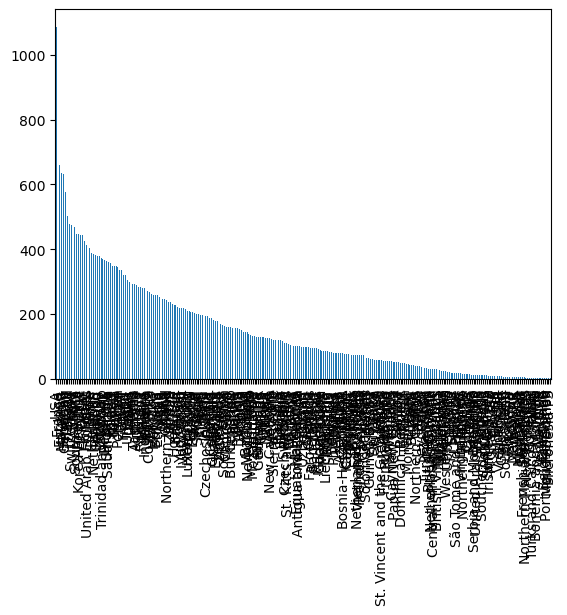

In [34]:
soccer_stats['country'].value_counts().plot(kind='bar')

To specify that we want a bar plot instead of the default line plot, pass the parameter `kind='bar'` into the `.plot()` method.

<Axes: >

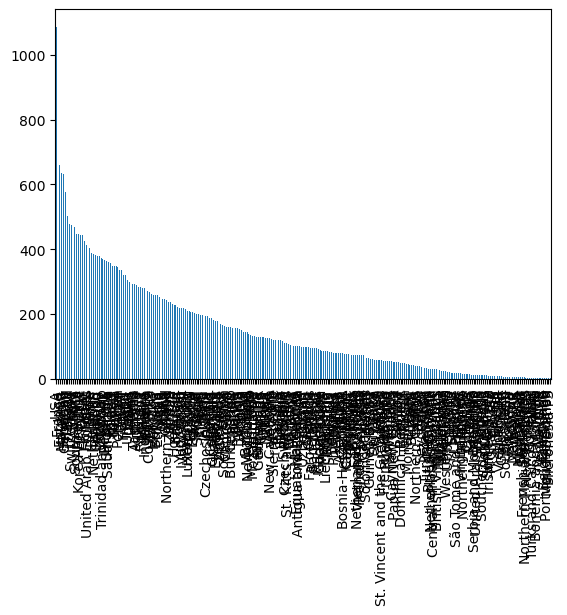

In [35]:
soccer_stats['country'].value_counts().plot(kind='bar')

This is unreadable! Let's plot the top 5 countries instead.

<Axes: >

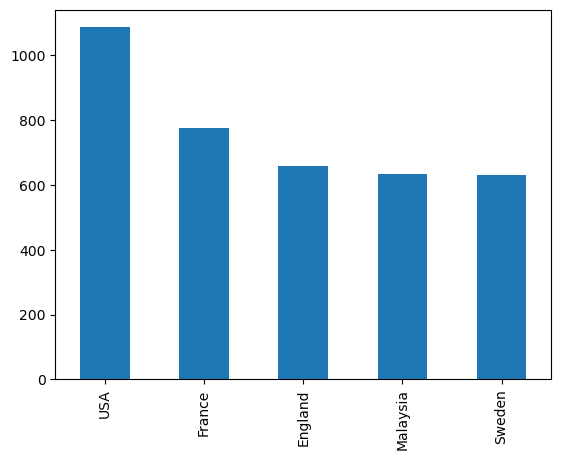

In [36]:
soccer_stats['country'].value_counts().head().plot(kind='bar')

Now let's plot the occurence of specific scores for the home team.

<Axes: >

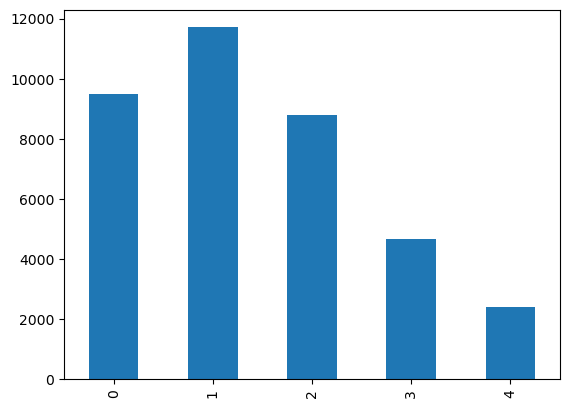

In [37]:
soccer_stats['home_score'].value_counts().sort_index().head().plot(kind = 'bar')

Note that the default sort order for value counts is descending, so our bars are sorted from largest to smallest. This caused the index labels on the x axis to appear out of order, but we can fix that by sorting the index just like we did for the years in our line plots.

<Axes: >

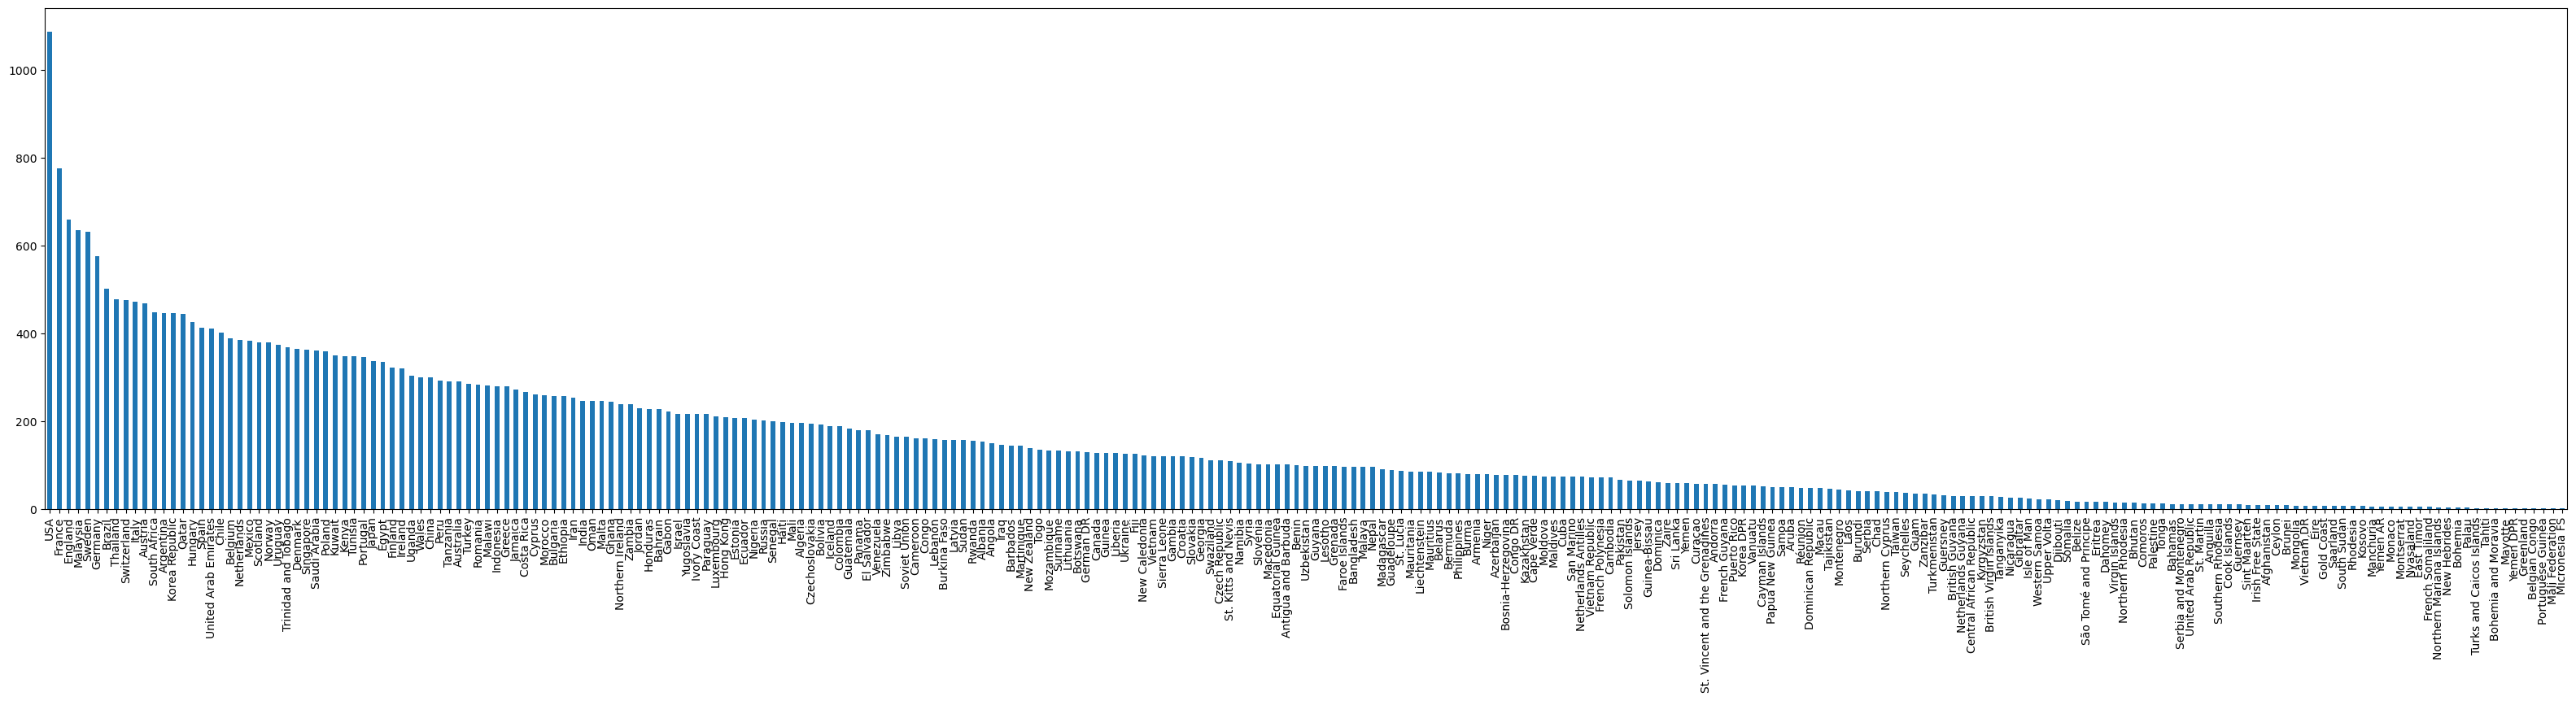

In [38]:
plt.figure(figsize=(40, 8))

soccer_stats['country'].value_counts().plot(kind='bar')

**BONUS:** Compare the home_score and away_score value counts to analyze home field advantage.

We will need to use the `.apply()` method to use `.value_counts()` on each column of a dataframe.

In [39]:
soccer_stats['country'].value_counts()

USA                  1087
France                775
England               659
Malaysia              634
Sweden                632
                     ... 
Greenland               2
Belgian Congo           1
Portuguese Guinea       1
Mali Federation         1
Micronesia FS           1
Name: country, Length: 265, dtype: int64

<Axes: >

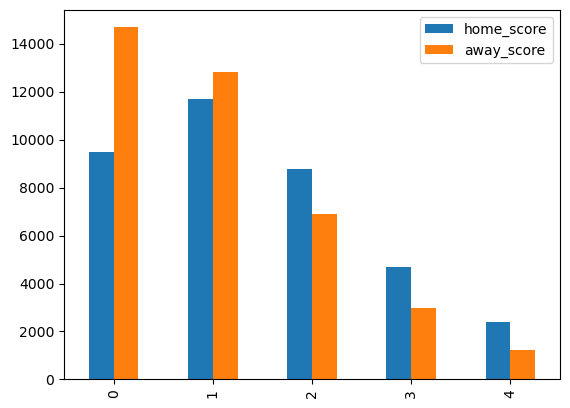

In [40]:
#Need 2 brackets to call it as a list, rather than a single column with 1 bracket. That column does not exist
soccer_stats[['home_score', 'away_score']].apply(pd.Series.value_counts).head().plot(kind = 'bar')

Note that plotting two columns at once gave us automatically-generated legend labels.

### Bar Charts vs. Histograms
---
Another common chart style is a **histogram**, which plots the **distribution of values** according to numerically defined groups rather than distinct categories.

Histograms are useful when you want to see how your data is distributed across groups. Note that histograms are not the same as bar charts! Histograms look similar to bar charts, but, with bar charts, each column represents a group defined by a categorical variable. With histograms, on the other hand, each column represents a group defined by a continuous, quantitative variable.

One implication of this distinction is that, with a histogram, it can be appropriate to talk about the tendency of the observations to fall more on the low end or the high end of the x axis. With bar charts, however, the x axis does not have a low end or a high end. This is because the labels on the x axis are categorical not quantitative


Let's load the penguins dataset to explore some new plot types. Inspect the data using some exploratory data analysis methods.

In [41]:
penguins = pd.read_csv('https://raw.githubusercontent.com/julianoquendoga/ga_datasets_repo/main/penguins.csv')

In [42]:
#Check for null values
penguins.isnull().sum()

studyName                0
Sample Number            0
Species                  0
Region                   0
Island                   0
Stage                    0
Individual ID            0
Clutch Completion        0
Date Egg                 0
Culmen Length (mm)       2
Culmen Depth (mm)        2
Flipper Length (mm)      2
Body Mass (g)            2
Sex                     10
Delta 15 N (o/oo)       14
Delta 13 C (o/oo)       13
Comments               290
dtype: int64

In [43]:
penguins.drop(columns = 'Comments', inplace = True)

In [44]:
penguins.dropna(inplace=True)

In [45]:
#verify null values are removed
penguins.isnull().sum()

studyName              0
Sample Number          0
Species                0
Region                 0
Island                 0
Stage                  0
Individual ID          0
Clutch Completion      0
Date Egg               0
Culmen Length (mm)     0
Culmen Depth (mm)      0
Flipper Length (mm)    0
Body Mass (g)          0
Sex                    0
Delta 15 N (o/oo)      0
Delta 13 C (o/oo)      0
dtype: int64

Rename the columns to be lowercase and use underscores instead of spaces:

In [46]:
#See column names
penguins.columns

Index(['studyName', 'Sample Number', 'Species', 'Region', 'Island', 'Stage',
       'Individual ID', 'Clutch Completion', 'Date Egg', 'Culmen Length (mm)',
       'Culmen Depth (mm)', 'Flipper Length (mm)', 'Body Mass (g)', 'Sex',
       'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)'],
      dtype='object')

In [47]:
#make columns lower case and use underscores for spaces in Python
[i.lower().replace(' ','_') for i in penguins.columns]

['studyname',
 'sample_number',
 'species',
 'region',
 'island',
 'stage',
 'individual_id',
 'clutch_completion',
 'date_egg',
 'culmen_length_(mm)',
 'culmen_depth_(mm)',
 'flipper_length_(mm)',
 'body_mass_(g)',
 'sex',
 'delta_15_n_(o/oo)',
 'delta_13_c_(o/oo)']

In [53]:
#Same as above in Pandas
penguins.columns = penguins.columns.str.lower().str.replace(' ','_')

In [55]:
penguins.columns

Index(['studyname', 'sample_number', 'species', 'region', 'island', 'stage',
       'individual_id', 'clutch_completion', 'date_egg', 'culmen_length_(mm)',
       'culmen_depth_(mm)', 'flipper_length_(mm)', 'body_mass_(g)', 'sex',
       'delta_15_n_(o/oo)', 'delta_13_c_(o/oo)'],
      dtype='object')

Drop the comments column that's full of nulls, then drop the rest of the nulls by row.

Let's start with plotting a distribution of the penguins body mass in grams.

<Axes: ylabel='Frequency'>

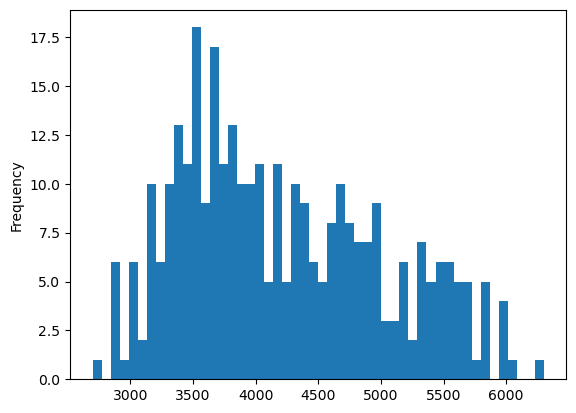

In [56]:
penguins['body_mass_(g)'].plot(kind='hist', bins= 50)

Looking good! Let's see how granular we can get by modifying the number of bins to change how the ranges are distributed.

Now add some descriptive labels to the chart.

Text(0.5, 1.0, 'Distribution!!')

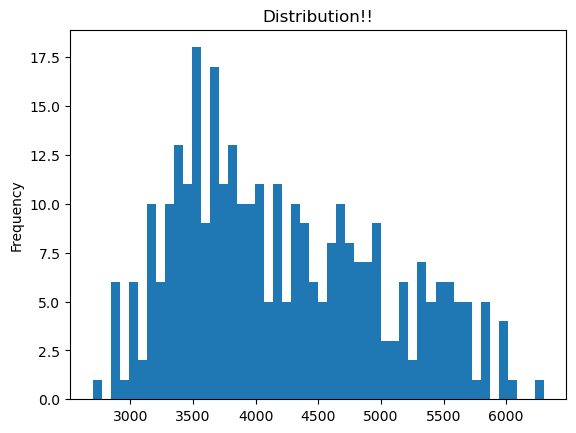

In [57]:
penguins['body_mass_(g)'].plot(kind='hist', bins= 50)
plt.title('Distribution!!')

What if we wanted to plot the distribution of body mass by each species individually?

In [59]:
penguins.groupby('species')['body_mass_(g)'].mean()

species
Adelie Penguin (Pygoscelis adeliae)          3702.697842
Chinstrap penguin (Pygoscelis antarctica)    3729.850746
Gentoo penguin (Pygoscelis papua)            5089.285714
Name: body_mass_(g), dtype: float64

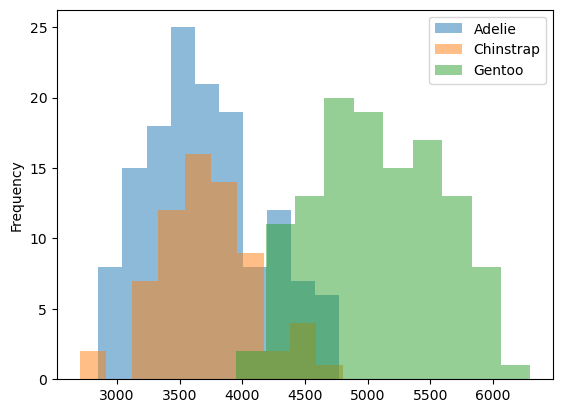

In [61]:
#Plot the distribution of body mass by each speices
penguins.groupby('species')['body_mass_(g)'].plot(kind='hist', alpha=0.5)

plt.legend(['Adelie', 'Chinstrap', 'Gentoo'])

## Scatter Plots
---
Scatterplots are great for giving viewers a sense of **trends, concentrations, and outliers.** They’re also useful for illustrating **correlations** between two variables, depending on whether the shape is clearly concentrated or scattered far apart. This will provide a clear idea of what you may want to investigate further.

Scatterplots intend to demonstrate the correlation, or lack thereof, between different variables. Therefore, we have to specify which columns to compare:
`data_frame.plot(kind='scatter', x='column_a', y='column_b')`

When used with discrete values, scatterplots will have large, hard-to-interpret clumps around those discrete values, making trend lines more difficult to picture. 


Let's practice making scatter plots with the penguins dataset.

Plot body mass against flipper length for one species of penguin.

In [62]:
penguins.columns

Index(['studyname', 'sample_number', 'species', 'region', 'island', 'stage',
       'individual_id', 'clutch_completion', 'date_egg', 'culmen_length_(mm)',
       'culmen_depth_(mm)', 'flipper_length_(mm)', 'body_mass_(g)', 'sex',
       'delta_15_n_(o/oo)', 'delta_13_c_(o/oo)'],
      dtype='object')

<Axes: xlabel='culmen_depth_(mm)', ylabel='flipper_length_(mm)'>

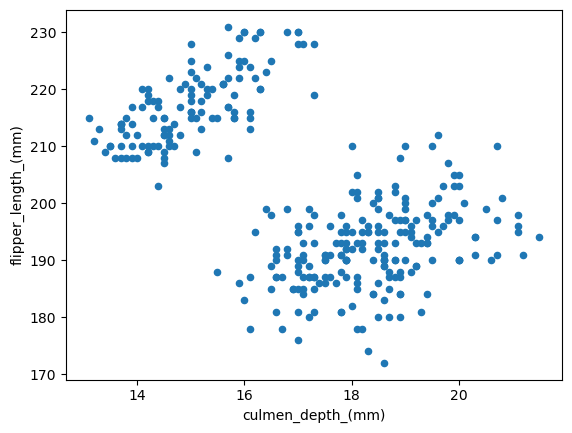

In [63]:
penguins.plot(kind= 'scatter', x = 'culmen_depth_(mm)', y = 'flipper_length_(mm)')

In [64]:
penguins.head()

,studyname,sample_number,species,region,island,stage,individual_id,clutch_completion,date_egg,culmen_length_(mm),culmen_depth_(mm),flipper_length_(mm),body_mass_(g),sex,delta_15_n_(o/oo),delta_13_c_(o/oo)
1,PAL0708,2,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N1A2,Yes,2007-11-11,39.5,17.4,186.0,3800.0,FEMALE,8.94956,-24.69454
2,PAL0708,3,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N2A1,Yes,2007-11-16,40.3,18.0,195.0,3250.0,FEMALE,8.36821,-25.33302
4,PAL0708,5,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A1,Yes,2007-11-16,36.7,19.3,193.0,3450.0,FEMALE,8.76651,-25.32426
5,PAL0708,6,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N3A2,Yes,2007-11-16,39.3,20.6,190.0,3650.0,MALE,8.66496,-25.29805
6,PAL0708,7,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N4A1,No,2007-11-15,38.9,17.8,181.0,3625.0,FEMALE,9.18718,-25.21799


In [68]:
#Filter for only the Adelie species of penguins
adelie_penguins = penguins['species'].str.contains('Adelie')

In [69]:
adelie_penguins

1       True
2       True
4       True
5       True
6       True
       ...  
339    False
340    False
341    False
342    False
343    False
Name: species, Length: 325, dtype: bool

<Axes: xlabel='culmen_depth_(mm)', ylabel='flipper_length_(mm)'>

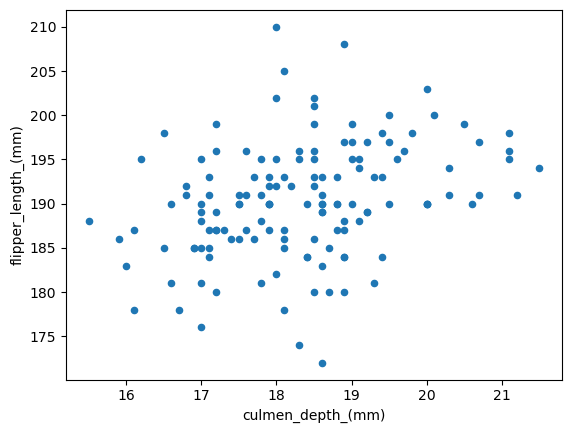

In [72]:
#Create a scatterplot of the Adelie penguins
penguins[adelie_penguins].plot(kind= 'scatter', x = 'culmen_depth_(mm)', y = 'flipper_length_(mm)')

Let's learn a new way to create figures using matplotlib.

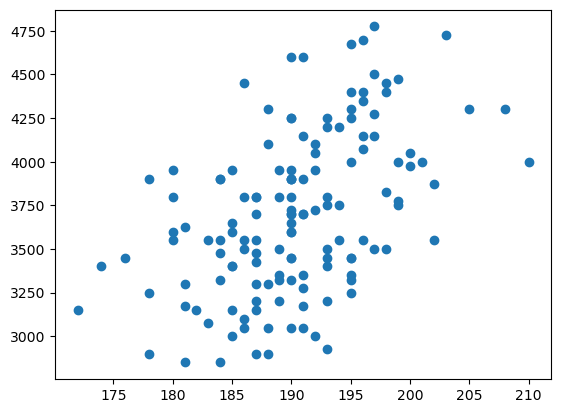

In [84]:
#Scatterplot
plt.scatter(penguins[adelie_penguins]['flipper_length_(mm)'], penguins[adelie_penguins]['body_mass_(g)'])

What if we want to see multiple plots side by side? We can achieve this with the `.subplots()` method!

In [75]:
gentoo = penguins[penguins['species'] == 'Gentoo penguin (Pygoscelis papua)']
chinstrap = penguins[penguins['species'] == 'Chinstrap penguin (Pygoscelis antarctica)']

Text(0.5, 0.98, 'Chart Title')

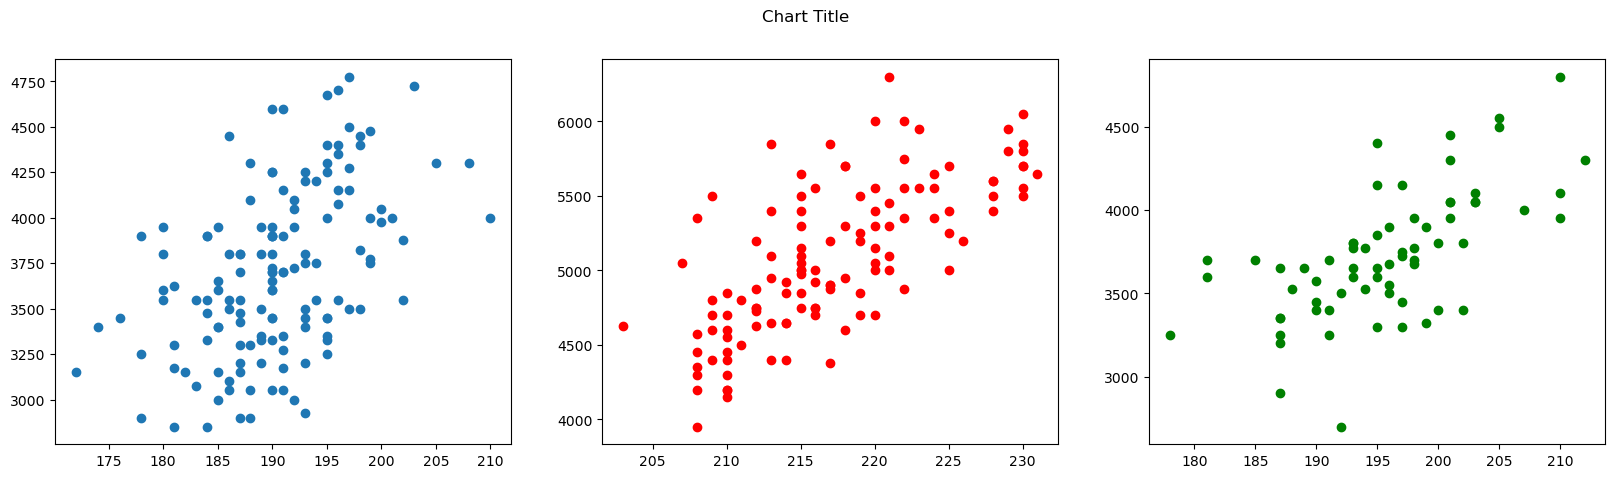

In [83]:
#Scatterplot for multiple Penguin species side by side
fig, ax = plt.subplots(1,3, figsize=(20,5))

ax[0].scatter(penguins[adelie_penguins]['flipper_length_(mm)'], penguins[adelie_penguins]['body_mass_(g)'])
ax[1].scatter(gentoo['flipper_length_(mm)'], gentoo['body_mass_(g)'], color= 'red')
ax[2].scatter(chinstrap['flipper_length_(mm)'], chinstrap['body_mass_(g)'], color ='green')


fig.suptitle('Chart Title')            

In [85]:
sns.countplot(data=penguins, x='species')

NameError: name 'sns' is not defined

Next we'll introduce another plotting package called [seaborn](https://seaborn.pydata.org/) that's great for statistical visualizations in python! It works alongside matplotlib and provides a variety of simple improvements to the plots we created today. 